# Dataset Visualization – DeepGlobe Land Cover Segmentation

This notebook explores the processed DeepGlobe dataset.
We visualize images, segmentation masks, and class distributions to ensure the data is suitable for model training.

## Section 1 - Import and set paths

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

## Processed Dataset Paths

In [2]:
PROJECT_ROOT = Path("..")
PROCESSED_DATA = PROJECT_ROOT / "data" / "processed"

TRAIN_IMAGES = PROCESSED_DATA / "train" / "images"
TRAIN_MASKS  = PROCESSED_DATA / "train" / "masks"

VALID_IMAGES = PROCESSED_DATA / "valid" / "images"
VALID_MASKS  = PROCESSED_DATA / "valid" / "masks"

print(f"Training images directory: {TRAIN_IMAGES}")
print(f"Training masks directory: {TRAIN_MASKS}")

Training images directory: ..\data\processed\train\images
Training masks directory: ..\data\processed\train\masks


## Load a Sample Image and Mask

In [3]:
sample_id = sorted(TRAIN_IMAGES.glob("*.npy"))[0].stem

image = np.load(TRAIN_IMAGES / f"{sample_id}.npy")
mask  = np.load(TRAIN_MASKS  / f"{sample_id}.npy")

print("Image shape:", image.shape)
print("Mask shape :", mask.shape)
print("Unique classes in mask:", np.unique(mask))

Image shape: (2448, 2448, 3)
Mask shape : (2448, 2448)
Unique classes in mask: [1 2 6]


## Section 2 - Visualize Image and Segmentation Mask

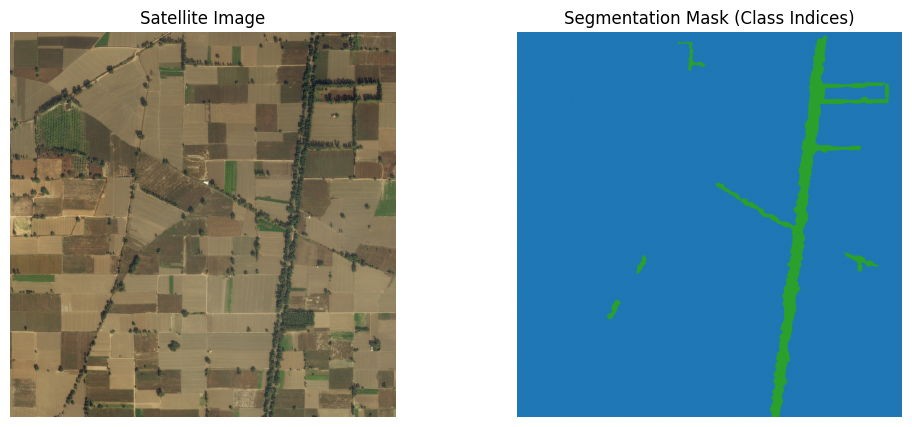

In [5]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Satellite Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap="tab10")
plt.title("Segmentation Mask (Class Indices)")
plt.axis("off")

plt.show()

## Section 3 - Pixel-Level Class Distribution

We compute how many pixels belong to each class across the training set. This helps detect class imbalance.

In [6]:
class_counter = Counter()

for mask_file in TRAIN_MASKS.glob("*.npy"):
    mask = np.load(mask_file)
    class_counter.update(mask.flatten())

class_counter

Counter({np.uint8(1): 2778345257,
         np.uint8(3): 537127505,
         np.uint8(0): 519877839,
         np.uint8(2): 408259879,
         np.uint8(5): 406664162,
         np.uint8(4): 159404064,
         np.uint8(6): 2462606})

## Class Distribution Plot

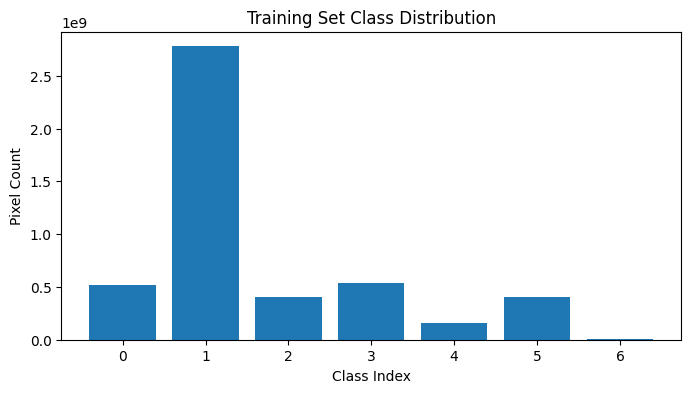

In [7]:
classes = list(class_counter.keys())
counts = [class_counter[c] for c in classes]

plt.figure(figsize=(8, 4))
plt.bar(classes, counts)
plt.xlabel("Class Index")
plt.ylabel("Pixel Count")
plt.title("Training Set Class Distribution")
plt.show()

## Section 4 - Multiple Sample Visualization

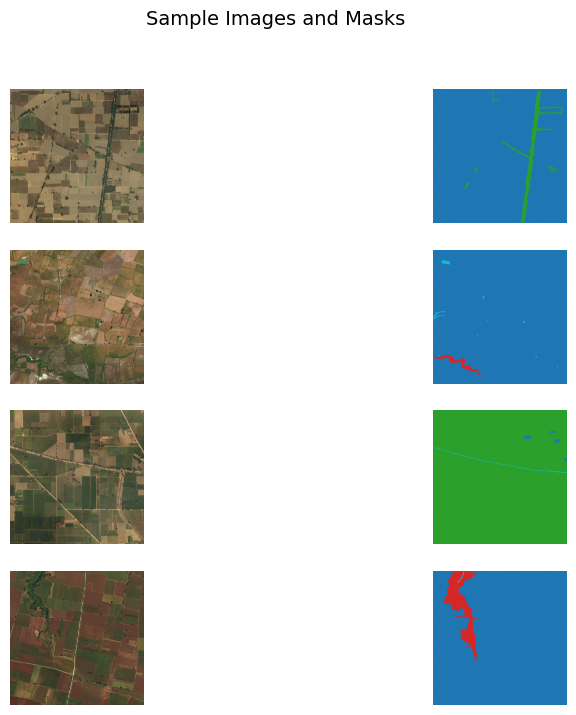

In [8]:
sample_files = sorted(TRAIN_IMAGES.glob("*.npy"))[:4]

plt.figure(figsize=(10, 8))

for i, img_file in enumerate(sample_files):
    sid = img_file.stem
    img = np.load(TRAIN_IMAGES / f"{sid}.npy")
    msk = np.load(TRAIN_MASKS / f"{sid}.npy")

    plt.subplot(4, 2, 2*i + 1)
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(4, 2, 2*i + 2)
    plt.imshow(msk, cmap="tab10")
    plt.axis("off")

plt.suptitle("Sample Images and Masks", fontsize=14)
plt.show()

## Summary

From this exploration we confirm:
- Processed data is correctly formatted
- Image–mask alignment is correct
- All 7 classes are present
- Class imbalance exists (expected for land cover data)

The dataset is now ready for deep learning model training.